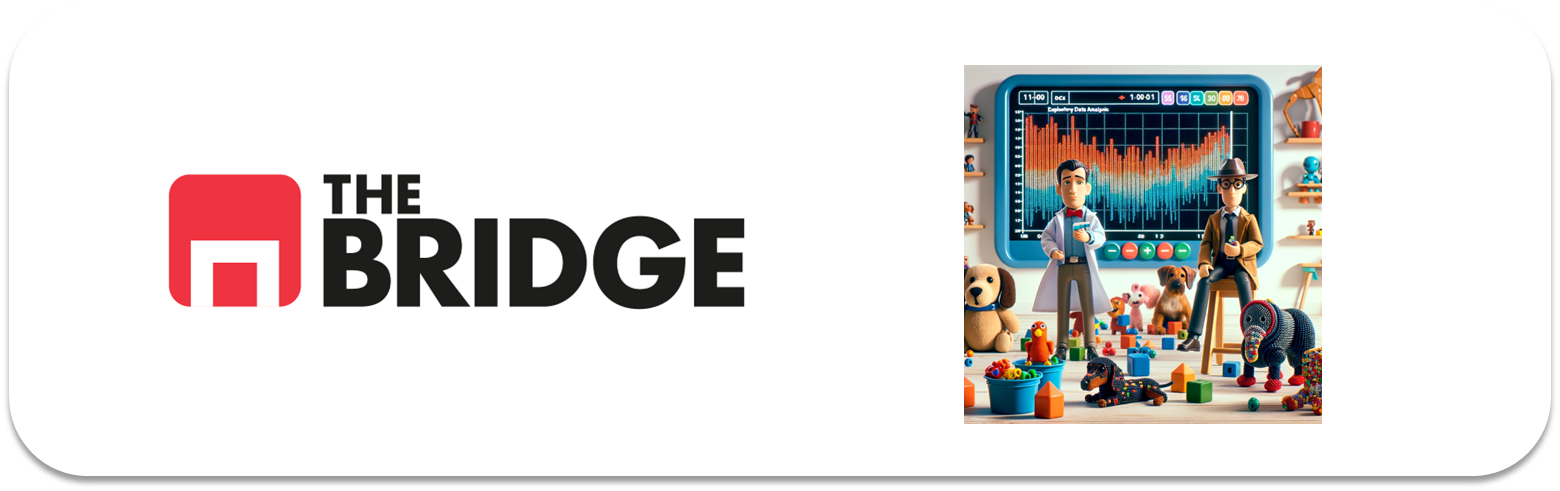

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from bootcampviztools import *


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df = pd.read_csv("/Users/feeelfree/Desktop/Miguel/DATA/bootcamp/ONLINE_DS_THEBRIDGE_MMONTUENGA/SPRINT7/CHALLENGE/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df.drop(columns=["deck","survived","pclass","embarked"],inplace=True)


In [4]:
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df["family_members"]=df["parch"]+df["sibsp"]
df.drop(columns=["parch","sibsp"],inplace=True)

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
moda=df.embark_town.mode().iloc[0]
df.embark_town=df.embark_town.fillna(moda)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
media_who=df.groupby("who")["age"].transform("mean")
df["age"]=df["age"].fillna(media_who)

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

In [8]:
df.groupby("alive")["who"].value_counts(False)

alive  who  
no     man      449
       woman     66
       child     34
yes    woman    205
       man       88
       child     49
Name: count, dtype: int64

In [9]:
df.groupby("alive")["who"].value_counts(True)


alive  who  
no     man      0.817851
       woman    0.120219
       child    0.061931
yes    woman    0.599415
       man      0.257310
       child    0.143275
Name: proportion, dtype: float64

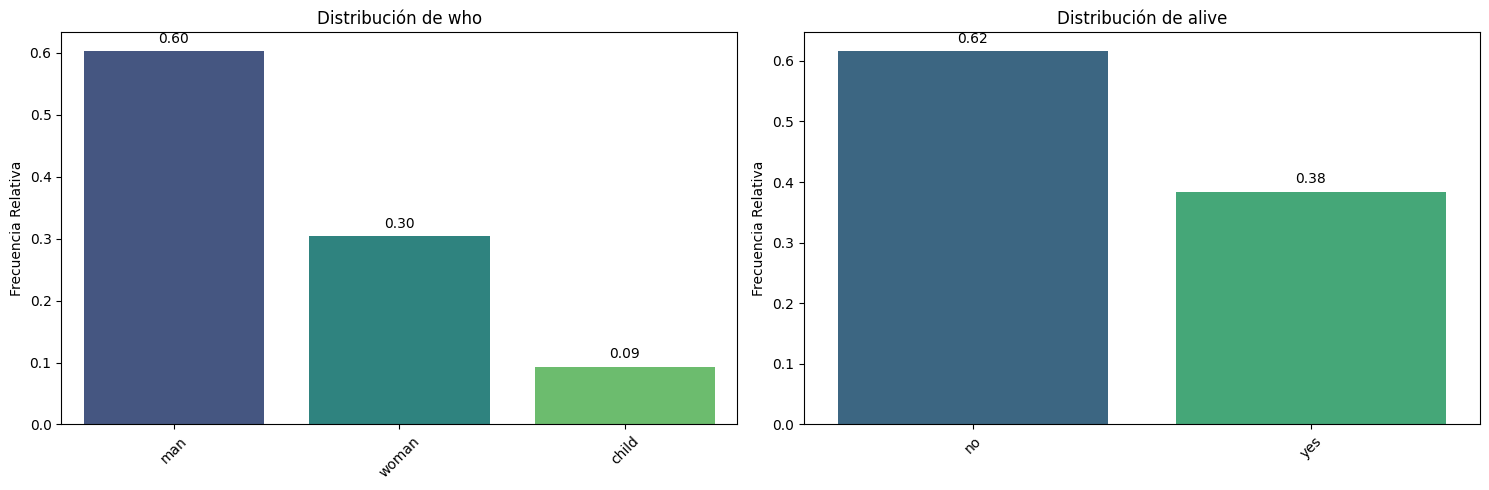

In [10]:
pinta_distribucion_categoricas(df,["who","alive"], relativa= True, mostrar_valores= True)

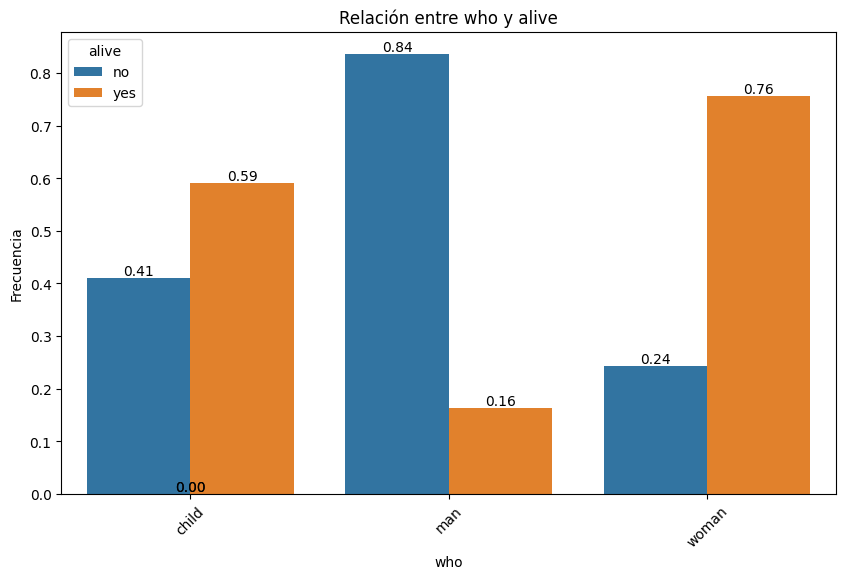

In [11]:
plot_categorical_relationship_fin(df, "who","alive",relative_freq=True, show_values= True)

In [12]:
tabla=pd.crosstab(df.who,df.alive)
chi2, p, dof, expected = chi2_contingency(tabla)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

#son dependientes

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


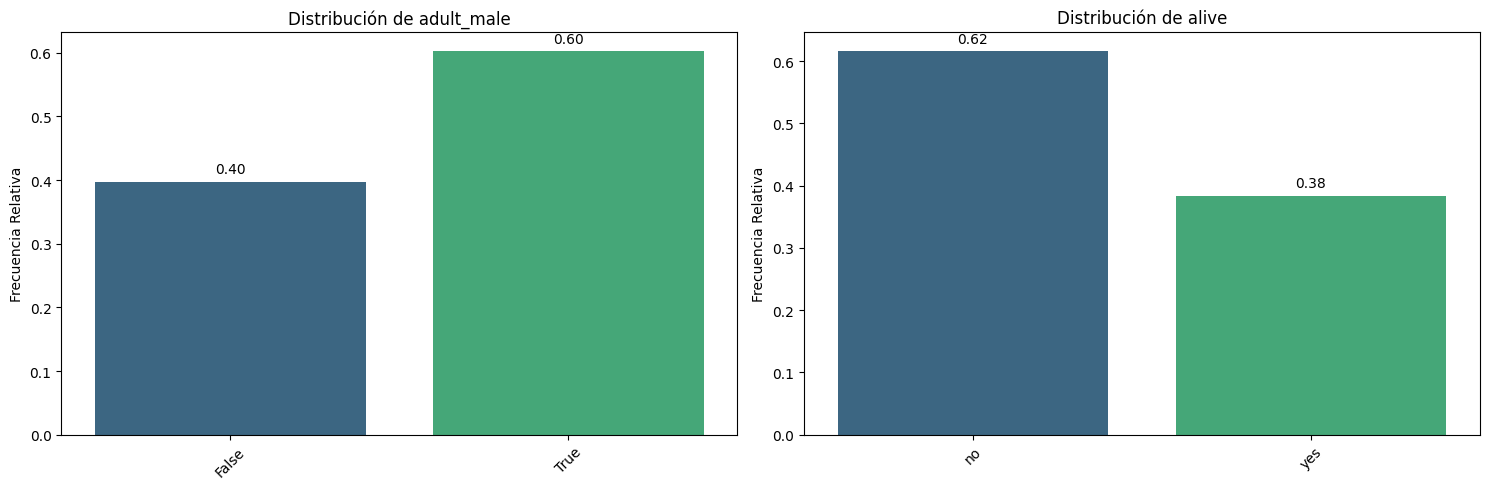

In [13]:
pinta_distribucion_categoricas(df,["adult_male","alive"], relativa= True, mostrar_valores= True)

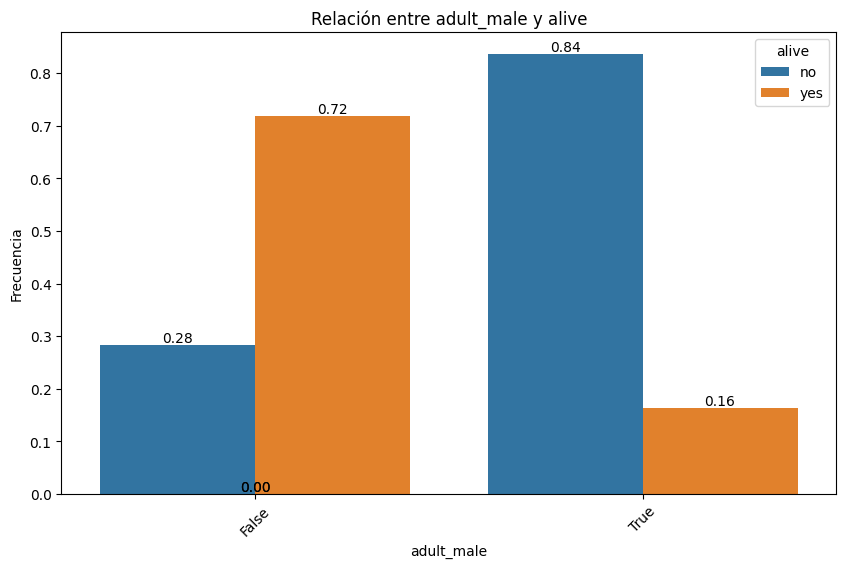

In [14]:
plot_categorical_relationship_fin(df, "adult_male","alive",relative_freq=True, show_values= True)

In [15]:
tabla=pd.crosstab(df.adult_male,df.alive)
chi2, p, dof, expected = chi2_contingency(tabla)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
#son dependientes

Valor Chi-Cuadrado: 274.1753554159945
P-Value: 1.3961564139018578e-61
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[218.12121212 135.87878788]
 [330.87878788 206.12121212]]


2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

In [16]:
df.groupby("alive")["class"].value_counts(False)

alive  class 
no     Third     372
       Second     97
       First      80
yes    First     136
       Third     119
       Second     87
Name: count, dtype: int64

In [17]:
df.groupby("alive")["class"].value_counts(True)

alive  class 
no     Third     0.677596
       Second    0.176685
       First     0.145719
yes    First     0.397661
       Third     0.347953
       Second    0.254386
Name: proportion, dtype: float64

In [19]:
tabla=pd.crosstab(df["class"],df.alive)
chi2, p, dof, expected = chi2_contingency(tabla)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
#valor P relativamente bajo, rechazamos hipótesis nula de independencia

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

In [20]:
df.groupby("alive")["embark_town"].value_counts(True)

alive  embark_town
no     Southampton    0.777778
       Cherbourg      0.136612
       Queenstown     0.085610
yes    Southampton    0.640351
       Cherbourg      0.271930
       Queenstown     0.087719
Name: proportion, dtype: float64

In [63]:
df.groupby("alive")["embark_town"].value_counts(False)

alive  embark_town
no     Southampton    427
       Cherbourg       75
       Queenstown      47
yes    Southampton    219
       Cherbourg       93
       Queenstown      30
Name: count, dtype: int64

In [64]:
tabla=pd.crosstab(df["embark_town"],df.alive)
chi2, p, dof, expected = chi2_contingency(tabla)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
#valor P relativamente bajo, rechazamos hipótesis nula de independencia

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?



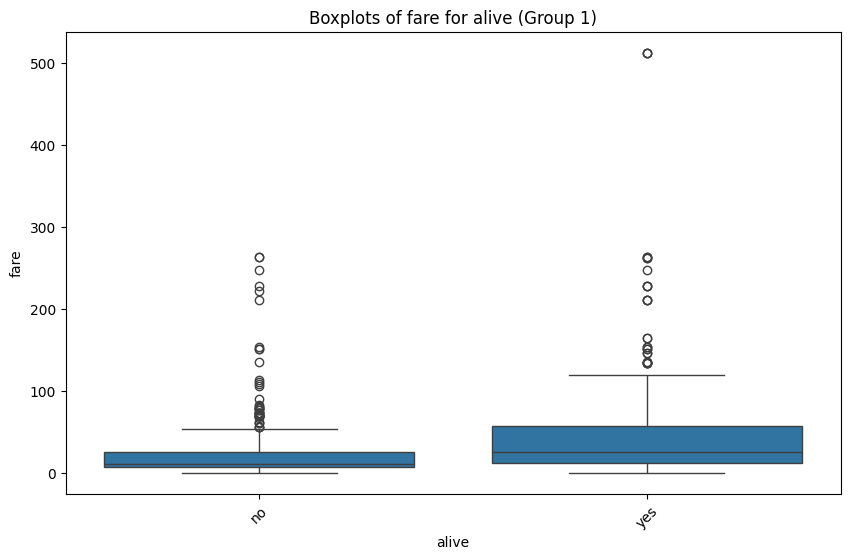

In [21]:
plot_grouped_boxplots(df,"alive","fare")

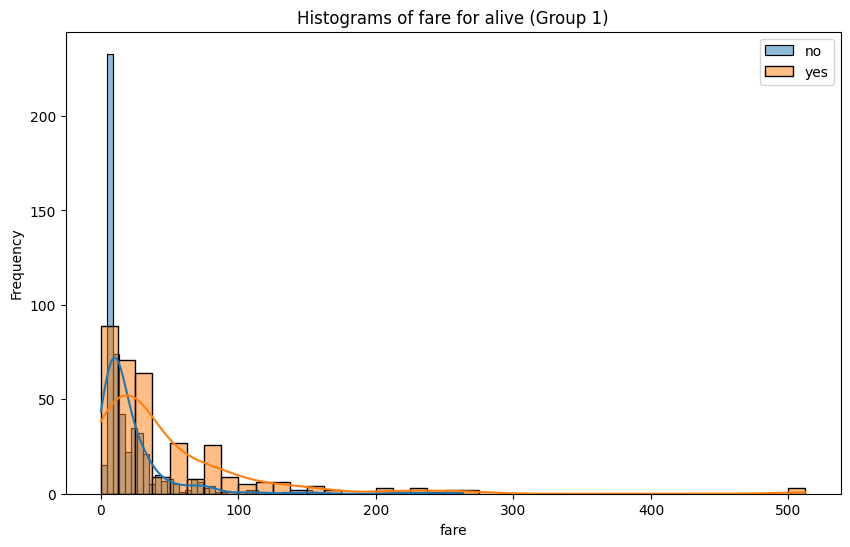

In [22]:
plot_grouped_histograms(df,"alive", "fare",20)

In [23]:
grupo_yes=df.loc[df.alive=="yes"]["fare"]
grupo_no=df.loc[df.alive=="no"]["fare"]
from scipy.stats import mannwhitneyu # Sí, de scipy.stats :-)


u_stat, p_valor = mannwhitneyu(grupo_yes, grupo_no)


print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

#hay diferencias siginificativas

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?



In [24]:
df.loc[df.fare==0] #son polizones

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [25]:
max_fare_row = df.loc[df['fare'].idxmax()]
print(max_fare_row)

sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
Name: 258, dtype: object



6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [26]:
df_Southampton=df.loc[df.embark_town=="Southampton"]
df_Cherbourg=df.loc[df.embark_town=="Cherbourg"]
df_Queenstown=df.loc[df.embark_town=="Queenstown"]


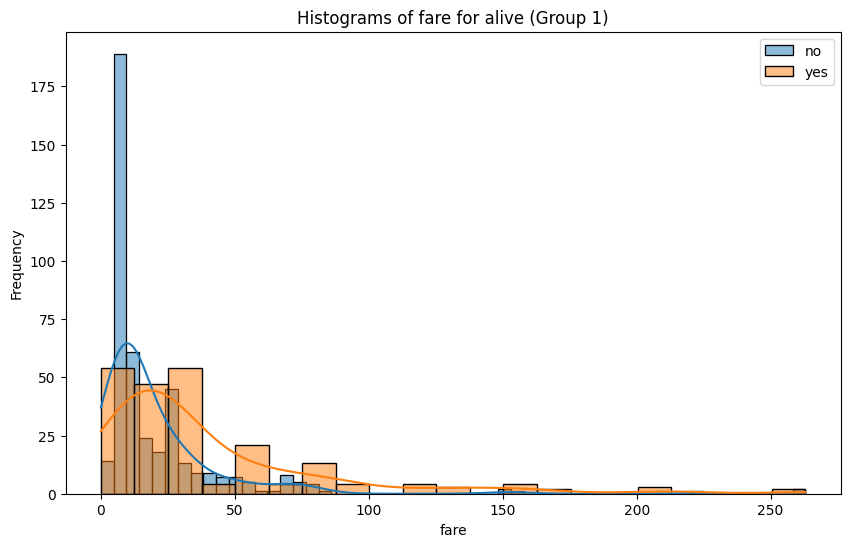

In [27]:
plot_grouped_histograms(df_Southampton,"alive", "fare",20)

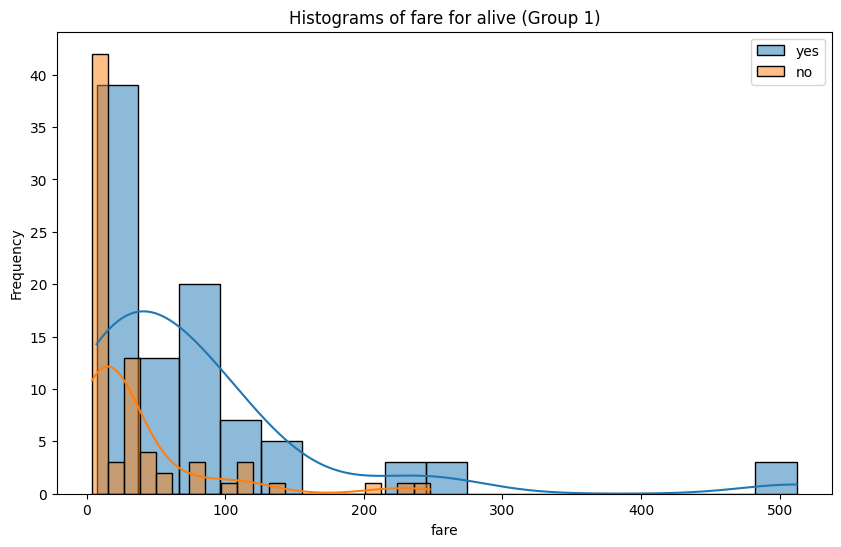

In [28]:
plot_grouped_histograms(df_Cherbourg,"alive", "fare",20)

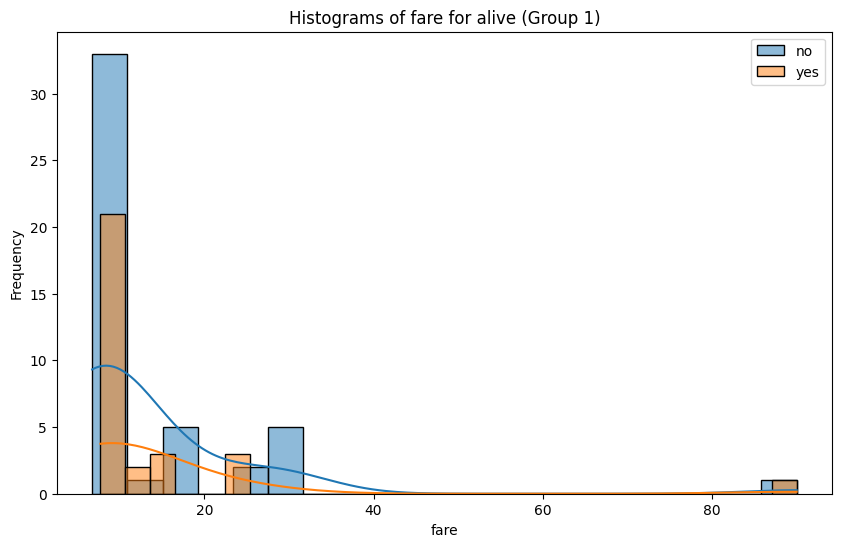

In [29]:
plot_grouped_histograms(df_Queenstown,"alive", "fare",20)

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?



In [30]:
bins = [0, 18, 35, 100]
labels = ['Joven', 'Adulto', 'Mayor']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.groupby(["alive","class"])["age_group"].value_counts(True)

alive  class   age_group
no     First   Mayor        0.575000
               Adulto       0.412500
               Joven        0.012500
       Second  Adulto       0.639175
               Mayor        0.340206
               Joven        0.020619
       Third   Adulto       0.701613
               Mayor        0.166667
               Joven        0.131720
yes    First   Mayor        0.492647
               Adulto       0.426471
               Joven        0.080882
       Second  Adulto       0.528736
               Joven        0.241379
               Mayor        0.229885
       Third   Adulto       0.697479
               Joven        0.243697
               Mayor        0.058824
Name: proportion, dtype: float64

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

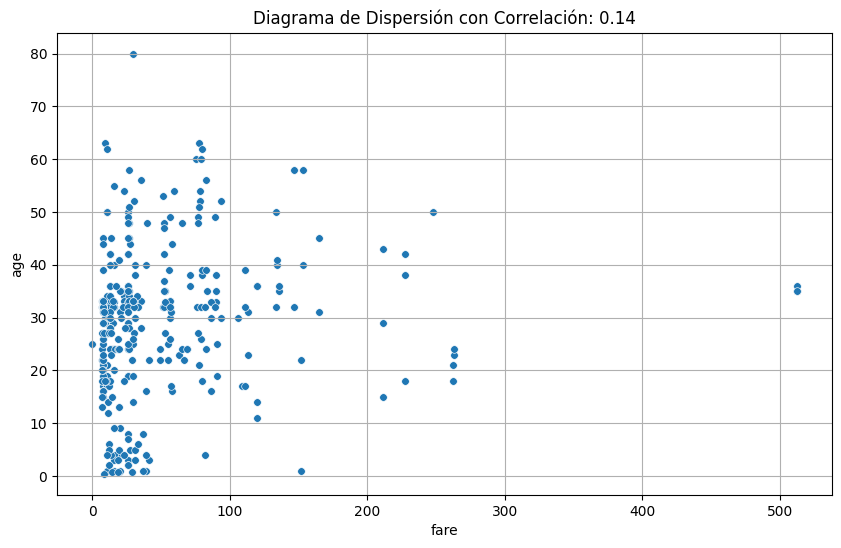

In [31]:
df_yes=df.loc[df.alive=="yes"]
df_no=df.loc[df.alive=="no"]


grafico_dispersion_con_correlacion(df_yes,"fare","age", mostrar_correlacion= True, tamano_puntos= 30)

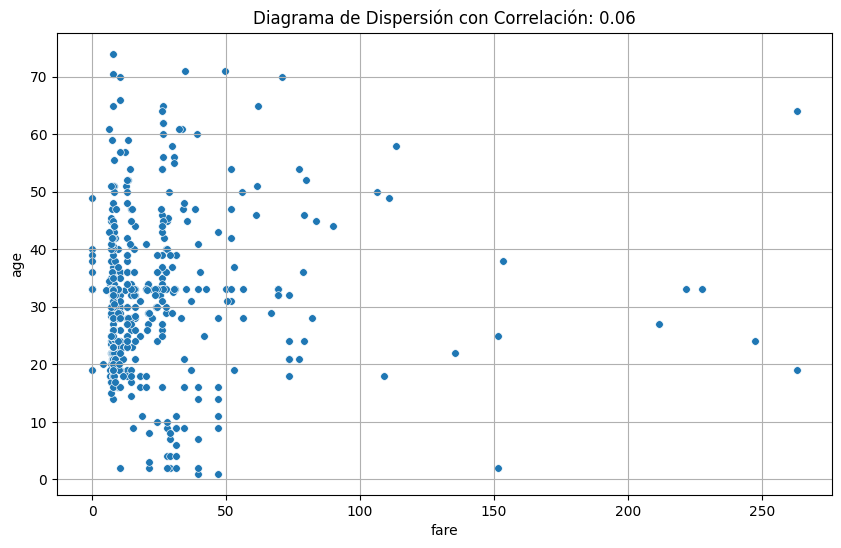

In [32]:
grafico_dispersion_con_correlacion(df_no,"fare","age", mostrar_correlacion= True, tamano_puntos= 30)

In [33]:
df_joven=df.loc[df['age_group']=="Joven"]
df_adulto=df.loc[df['age_group']=="Adulto"]
df_mayor=df.loc[df['age_group']=="Mayor"]

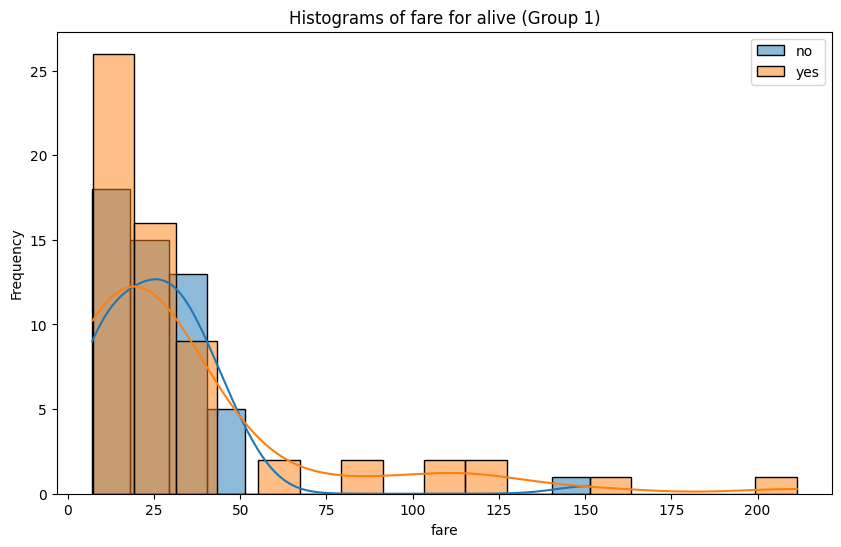

In [34]:
plot_grouped_histograms(df_joven,"alive", "fare",20)


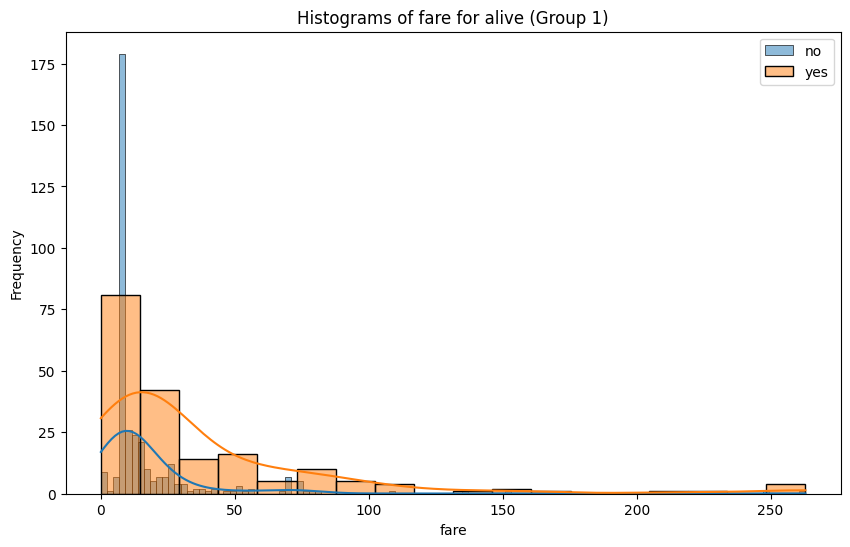

In [35]:
plot_grouped_histograms(df_adulto,"alive", "fare",20)


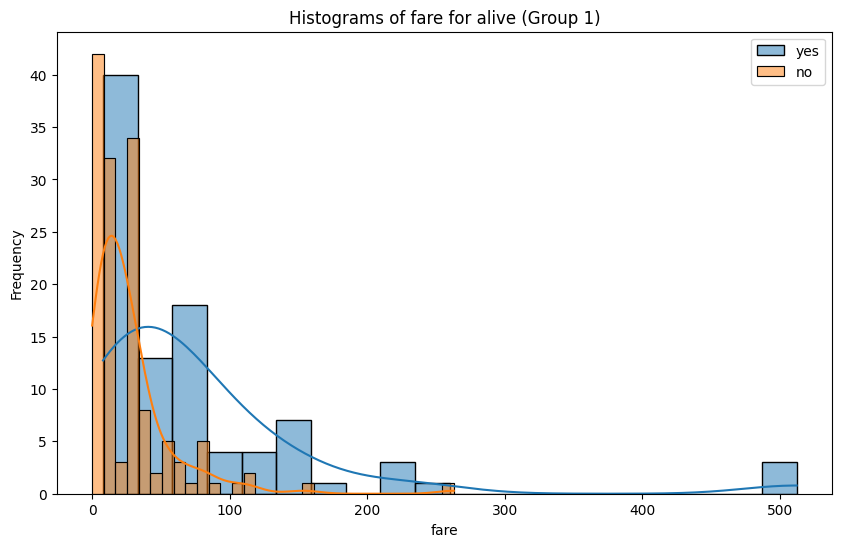

In [36]:
plot_grouped_histograms(df_mayor,"alive", "fare",20)



## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [2]:
df_viajes = pd.read_csv("/Users/feeelfree/Desktop/Miguel/DATA/bootcamp/ONLINE_DS_THEBRIDGE_MMONTUENGA/SPRINT7/CHALLENGE/dataset_viajes_jun23.csv")
df_viajes

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


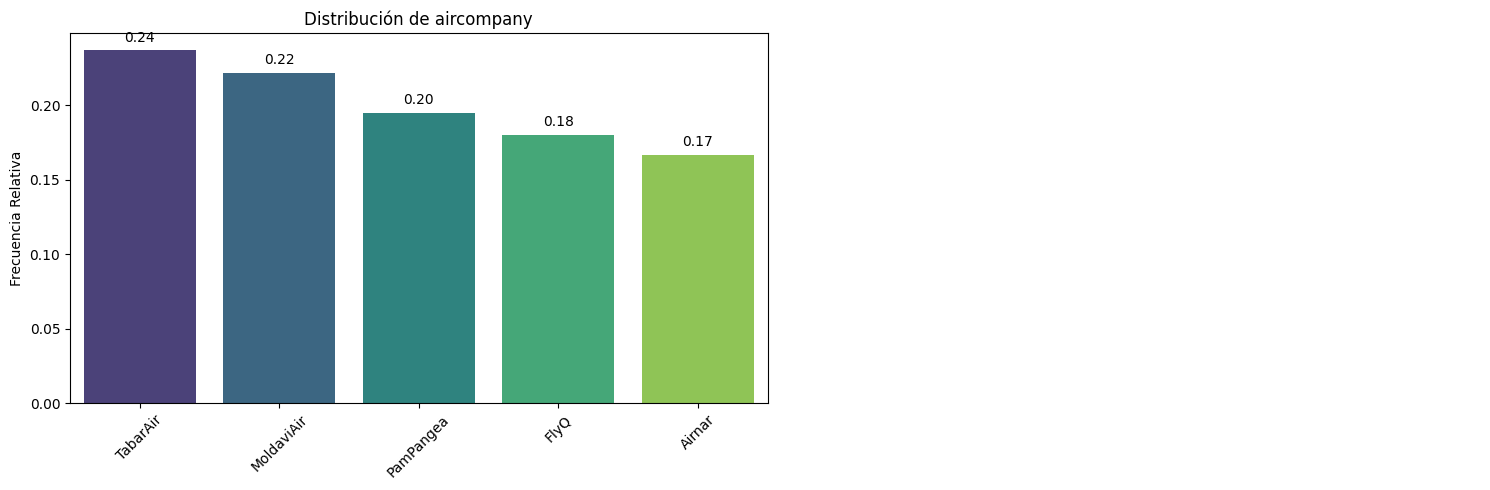

In [3]:
pinta_distribucion_categoricas(df_viajes,["aircompany"], relativa= True, mostrar_valores= True)

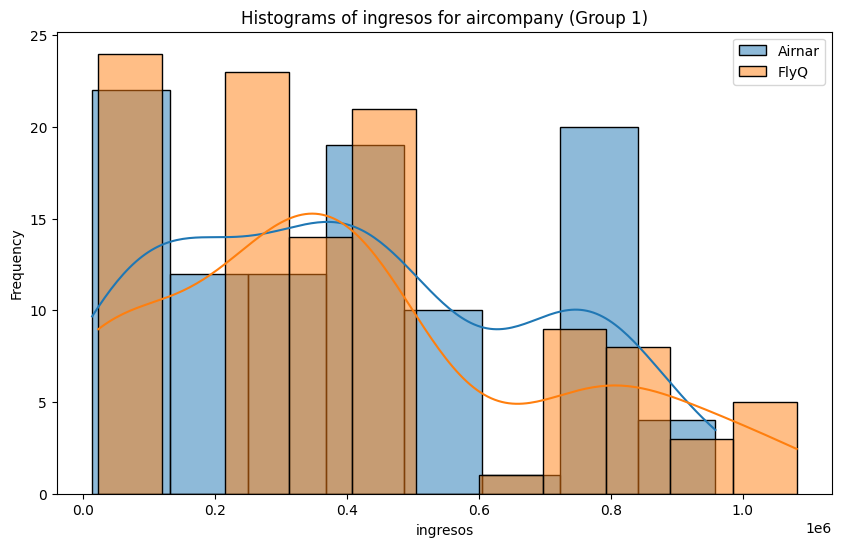

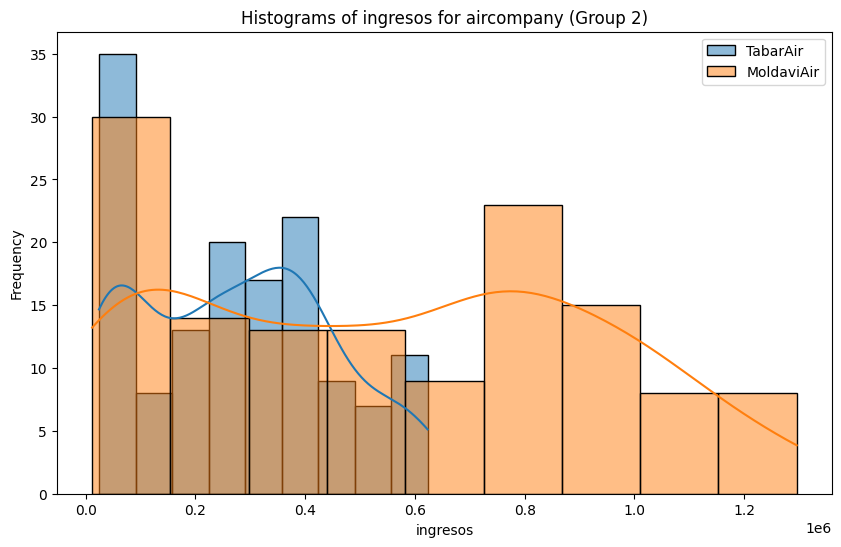

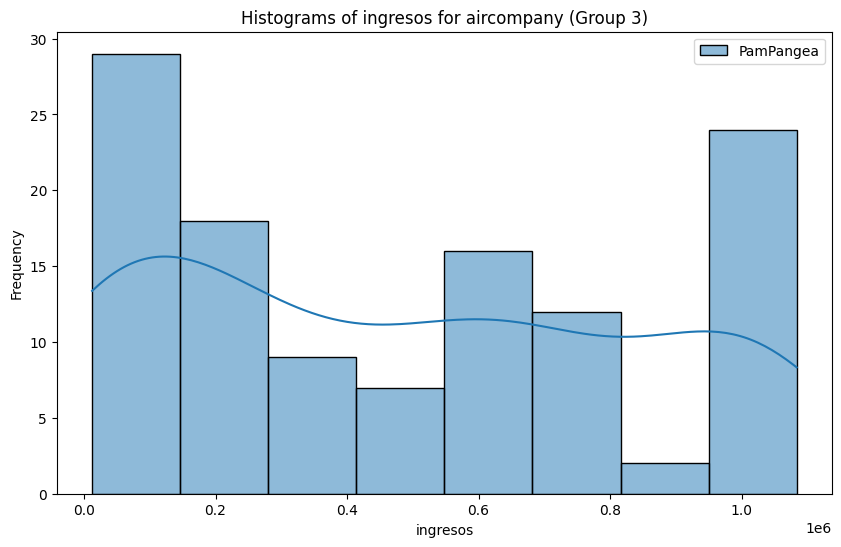

In [4]:
plot_grouped_histograms(df_viajes,"aircompany", "ingresos",2)


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

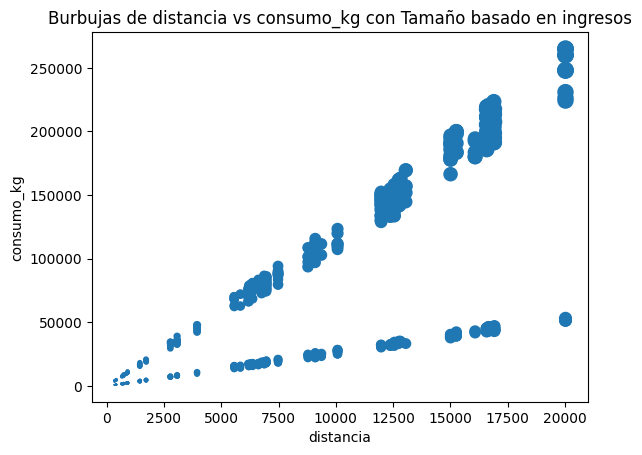

In [5]:
bubble_plot(df_viajes,"distancia","consumo_kg","ingresos", scale = 10000)

In [10]:
df_viajes_escala=df_viajes.loc[df_viajes.con_escala==True]
df_viajes_sin_escala=df_viajes.loc[df_viajes.con_escala==False]

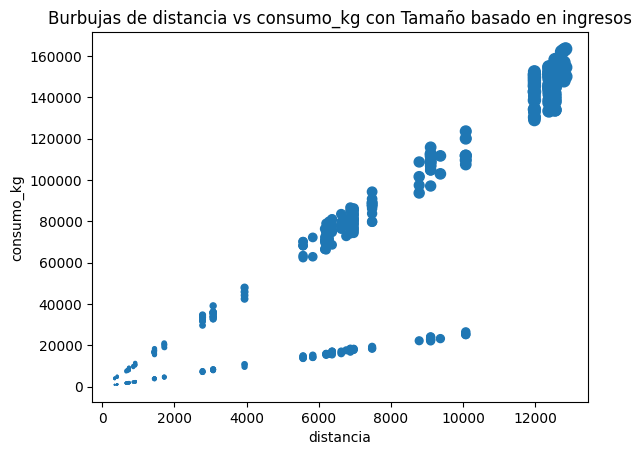

In [13]:
bubble_plot(df_viajes_sin_escala,"distancia","consumo_kg","ingresos", scale = 10000)

compañía, Airnar


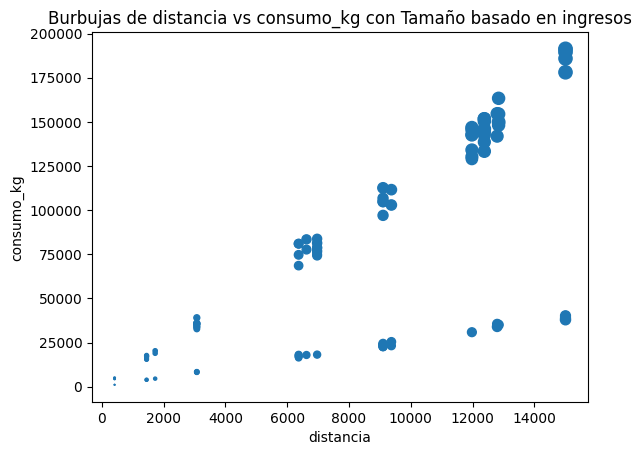

compañía, FlyQ


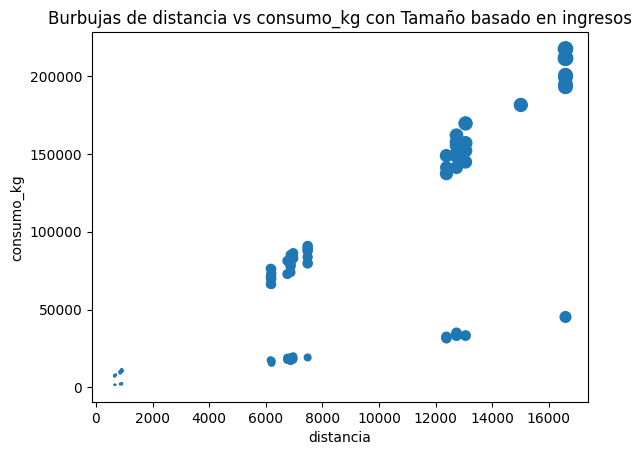

compañía, TabarAir


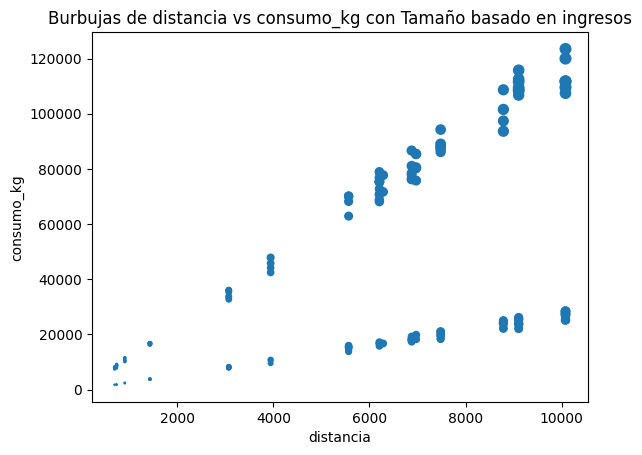

compañía, MoldaviAir


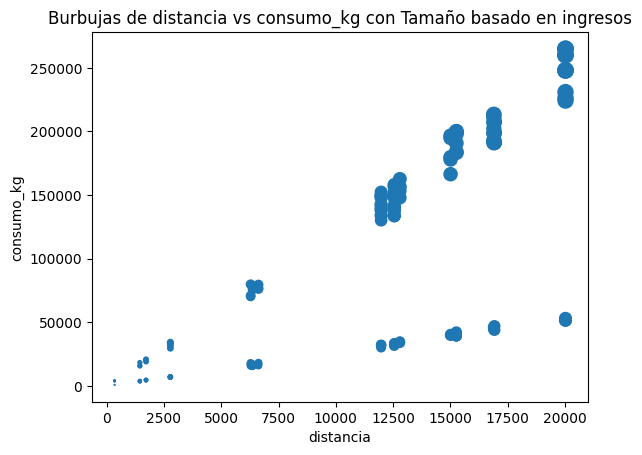

compañía, PamPangea


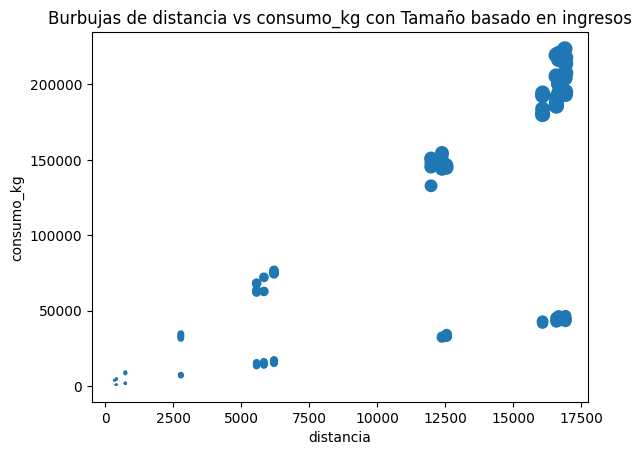

In [14]:
aircompanies = df_viajes['aircompany'].unique()
for aircompany in aircompanies:
    df_filtered = df_viajes[df_viajes['aircompany'] == aircompany]
    print(f"compañía, {aircompany}")
    bubble_plot(df_filtered, "distancia", "consumo_kg", "ingresos", scale=10000)

In [24]:
bins = [0, 224, 542, 876, 999999]
labels = ['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4']
df_viajes['duracion_agrupada'] = pd.cut(df_viajes['duracion'], bins=bins, labels=labels, right=False)

duracion, Bin_1


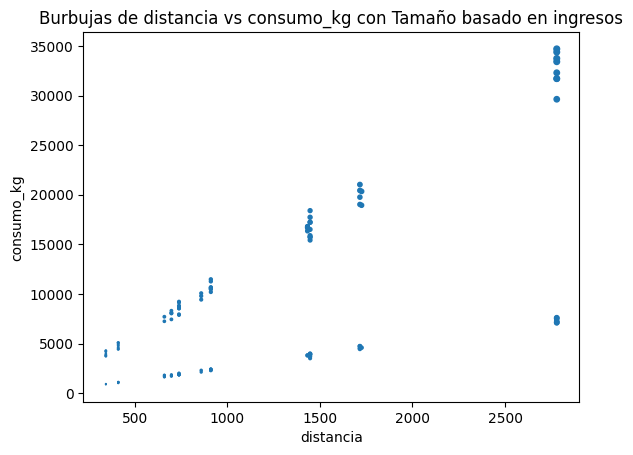

duracion, Bin_4


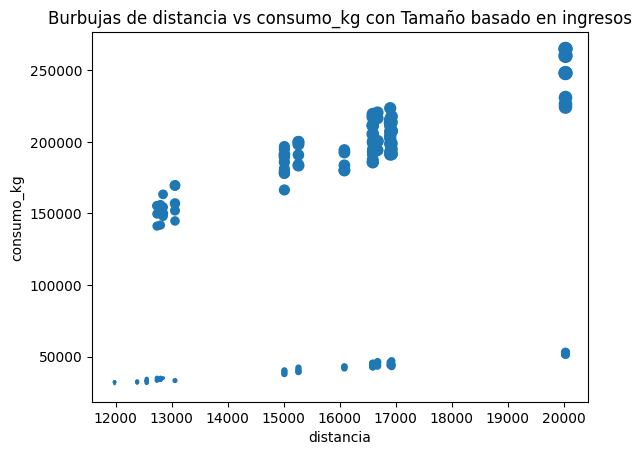

duracion, Bin_3


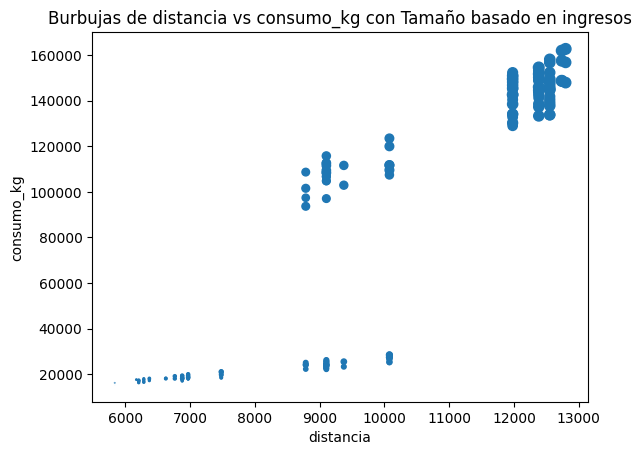

duracion, Bin_2


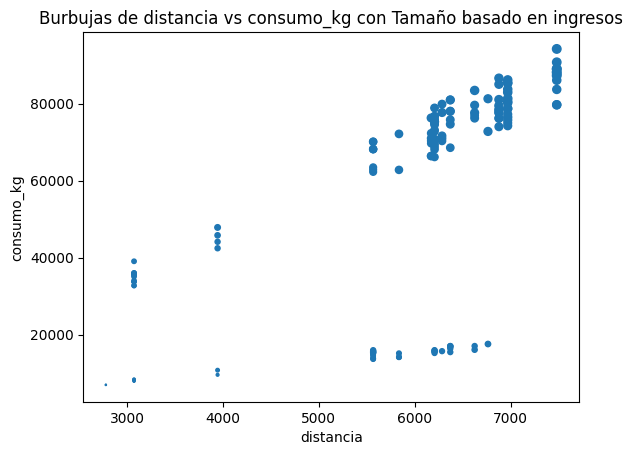

In [32]:
aircompanies = df_viajes['duracion_agrupada'].unique()
for aircompany in aircompanies:
    df_filtered = df_viajes[df_viajes['duracion_agrupada'] == aircompany]
    print(f"duracion, {aircompany}")
    bubble_plot(df_filtered, "distancia", "consumo_kg", "ingresos", scale=10000)

In [34]:
bins = [0, 3073, 6877.000000, 12553.000000, 999999999999]
labels = ['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4']
df_viajes['distancia_agrupada'] = pd.cut(df_viajes['distancia'], bins=bins, labels=labels, right=False)

distancia, Bin_1


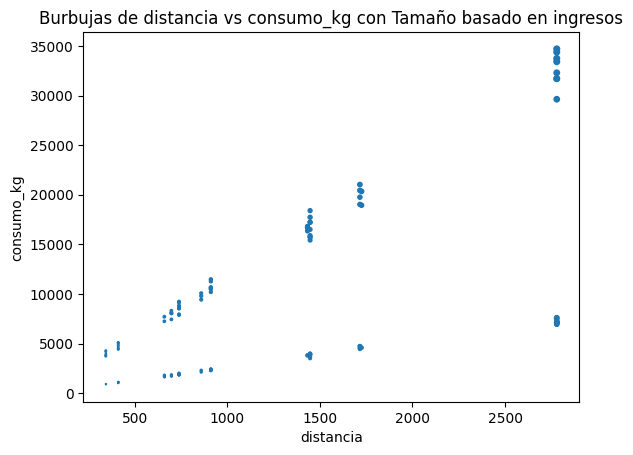

distancia, Bin_4


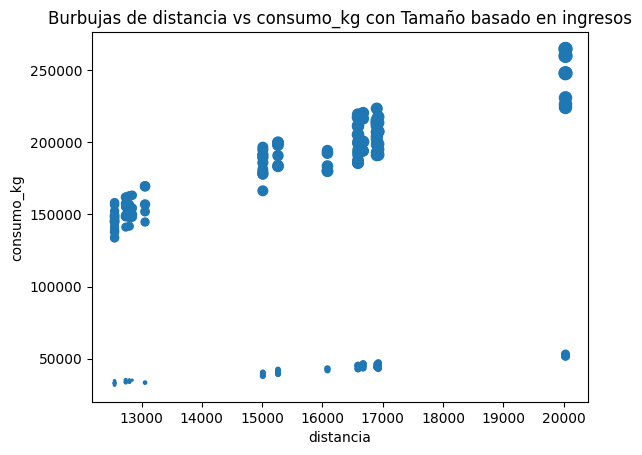

distancia, Bin_3


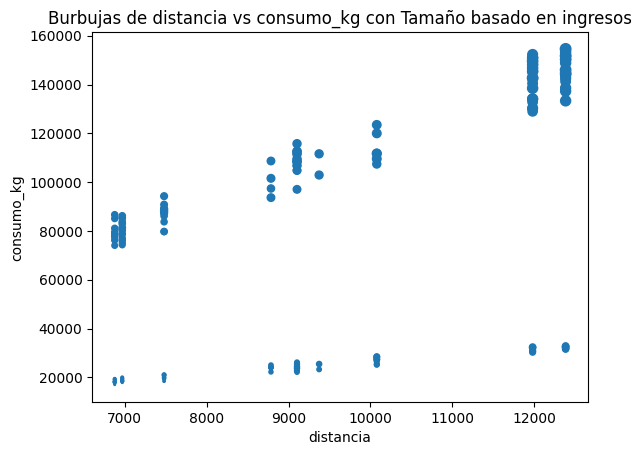

distancia, Bin_2


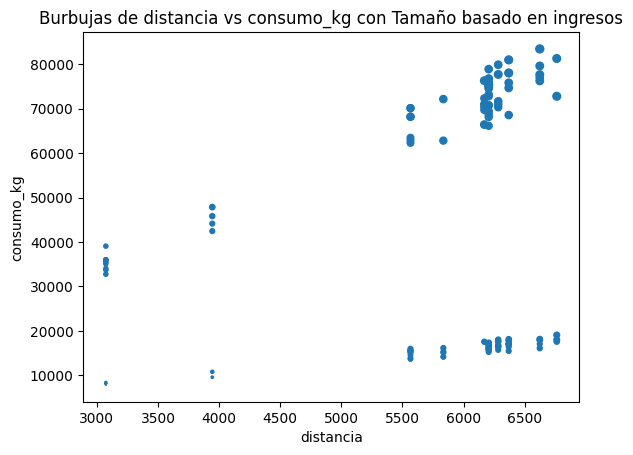

In [35]:
aircompanies = df_viajes['distancia_agrupada'].unique()
for aircompany in aircompanies:
    df_filtered = df_viajes[df_viajes['distancia_agrupada'] == aircompany]
    print(f"distancia, {aircompany}")
    bubble_plot(df_filtered, "distancia", "consumo_kg", "ingresos", scale=10000)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.